Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import os
import sys

In [6]:
heartD_df = pd.read_csv('C://Users//12499//OneDrive//Documents//Durham College//AI Algorithm//Final Project//framingham.csv')

In [4]:
heartD_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Exploratory Data Analysis

In [ ]:
from collections import Counter
import pandas_profiling as pp

In [10]:
pp.ProfileReport(heartD_df)

Number of variables,16
Number of observations,4238
Total Missing (%),1.0%
Total size in memory,529.8 KiB
Average record size in memory,128.0 B
Numeric,10
Categorical,0
Boolean,6
Date,0
Text (Unique),0
Rejected,0


In [6]:
heartD_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Replacing the missing education value with 0

In [8]:
heartD_df.education.fillna(0,inplace=True)

Missing values in column cigsPerDay, BPMeds, TotChol, BMI, heartRate, glucose are replaced with median:

In [14]:
heartD_df.cigsPerDay.fillna(heartD_df.cigsPerDay.where(heartD_df.currentSmoker==1).median(),inplace=True)
heartD_df.BPMeds.fillna(0,inplace=True)
heartD_df['totChol'].fillna(heartD_df.totChol.median(),inplace=True)
heartD_df['BMI'].fillna(heartD_df.BMI.median(),inplace=True)
heartD_df['heartRate'].fillna(heartD_df['heartRate'].where(heartD_df['currentSmoker']==1).median(),inplace=True)
heartD_df['glucose'].fillna(heartD_df['glucose'].where(heartD_df['diabetes']==0).median(),inplace=True)

In [15]:
heartD_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
heartD_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.930425,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.053026,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [17]:
heartD_df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [18]:
heartD_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [19]:
col = ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

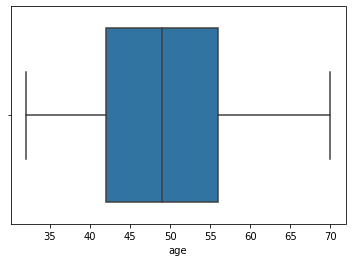

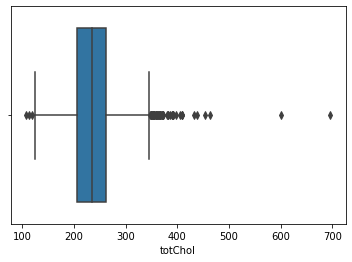

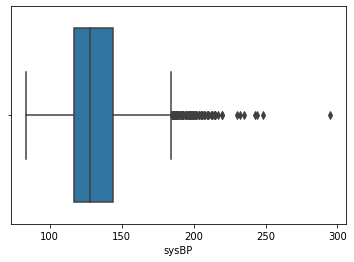

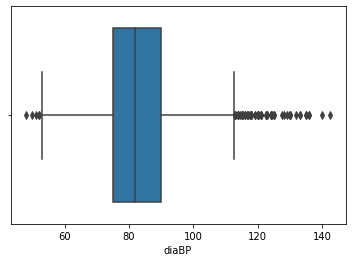

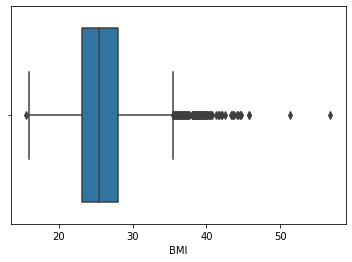

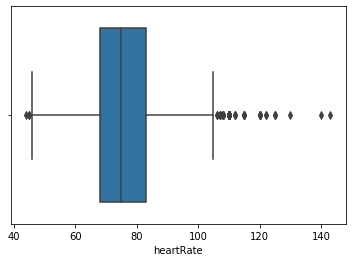

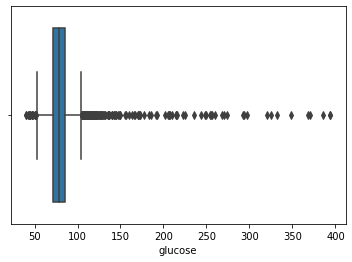

In [20]:
for i in col:
    sns.boxplot(heartD_df[i])
    plt.show()

There are outliers in the columns 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'

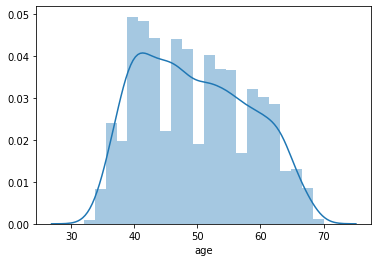

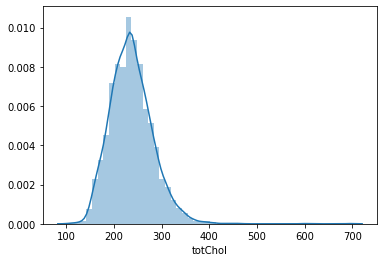

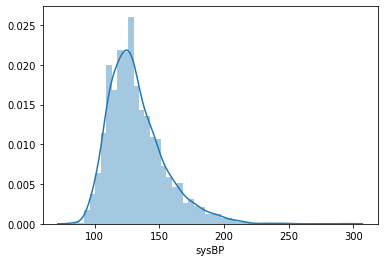

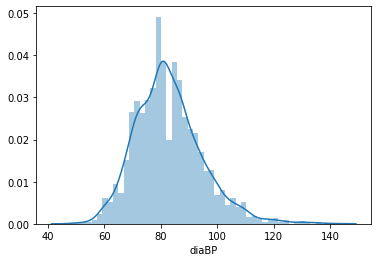

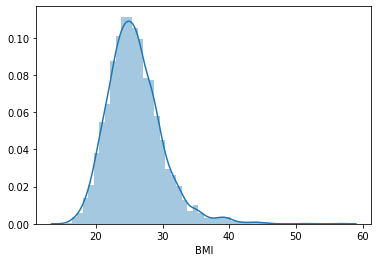

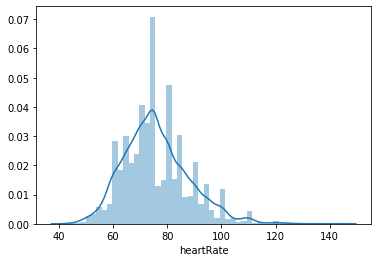

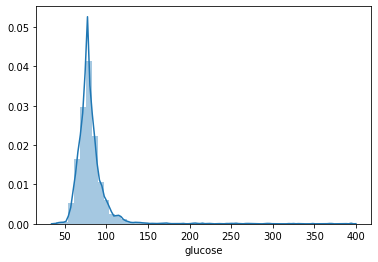

In [21]:
for i in col:
    sns.distplot(heartD_df[i])
    plt.show()

## removing outliers

In [22]:
df1 = heartD_df.copy()

# To remove outliers
for i in col:
    q1 = df1[i].quantile(q=0.25)
    q2 = df1[i].quantile()
    q3 = df1[i].quantile(q=0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr

    df1 = df1[(df1[i]<ul ) & (df1[i]>ll)] 

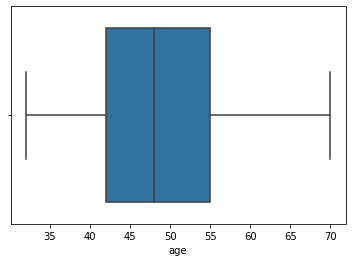

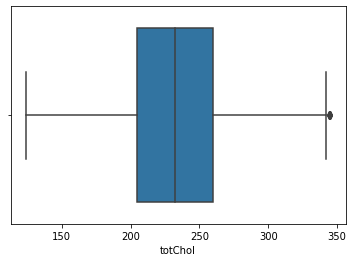

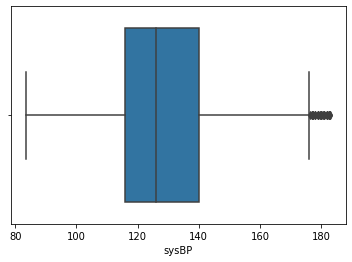

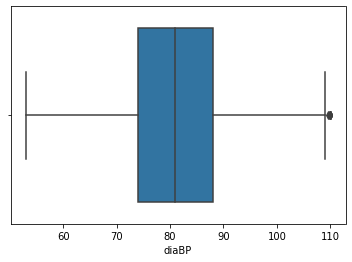

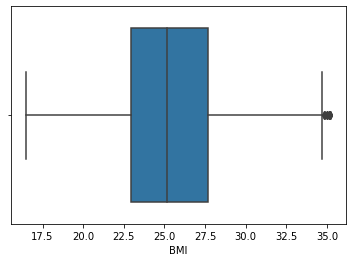

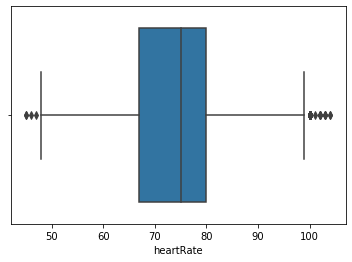

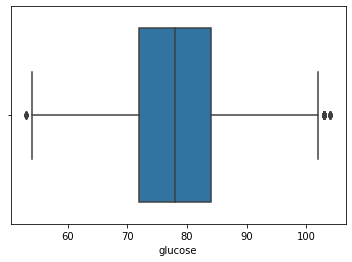

In [24]:
for i in col:
    sns.boxplot(df1[i])
    plt.show()

## EDA

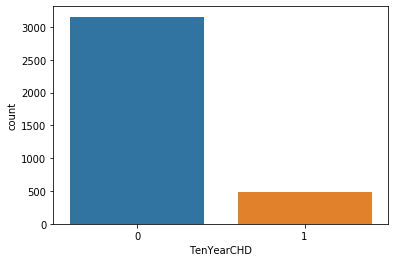

In [26]:
sns.countplot(df1['TenYearCHD'],)
plt.show()

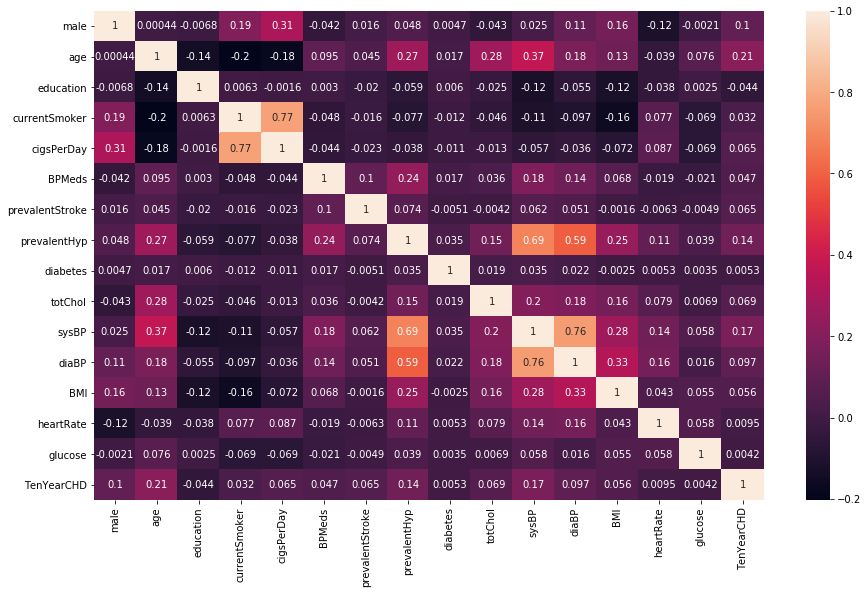

In [28]:
cor = df1.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cor,annot=True)
plt.show()

## Stats modeling

In [31]:
X = df1.drop(['TenYearCHD'], axis=1)
y = df1['TenYearCHD']
import statsmodels.api as sm

X_const = sm.add_constant(X)

In [32]:
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.365105
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3639
Model:                          Logit   Df Residuals:                     3624
Method:                           MLE   Df Model:                           14
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                 0.06874
Time:                        19:58:27   Log-Likelihood:                -1328.6
converged:                       True   LL-Null:                       -1426.7
Covariance Type:            nonrobust   LLR p-value:                 3.349e-34
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4652      0.111      4.183      0.000       0.247       0.683
age                 0.0488      0.007      7.498      0.000       0.036       0.062
education          -0.0951      0.048     -1.985      0.047      -0.189      -0.001
currentSmoker      -0.1563      0.160     -0.975      0.329      -0.470       0.158
cigsPerDay          0.0199      0.006      3.164      0.002       0.008       0.032
BPMeds              0.0611      0.301      0.203      0.839      -0.529       0.651
prevalentStroke     1.1482      0.518      2.215      0.027       0.132       2.164
prevalentHyp        0.7822      0.137      5.727      0.000       0.515       1.050
diabetes           -0.0138      0.645     -0.021      0.983      -1.279       1.251
totChol            -0.0007      0.001     -0.526      0.599      -0.003       0.002
sysBP               0.0103      0.005      2.171      0.030       0.001       0.020
diaBP              -0.0285      0.007     -3.934      0.000      -0.043      -0.014
BMI                -0.0400      0.015     -2.623      0.009      -0.070      -0.010
heartRate          -0.0120      0.005     -2.610      0.009      -0.021      -0.003
glucose            -0.0218      0.005     -4.644      0.000      -0.031      -0.013
===================================================================================
"""